In [1]:
import astropy.units as u
import astropy.coordinates as coord
import matplotlib.pyplot as plt
import numpy as np
import gala.integrate as gi
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

First, define a gravitational potential.

In [2]:
pot = gp.MilkyWayPotential()

Select a star.

In [7]:
dict1 = {
    'ra': 136.93746493225 * u.degree,
    'e_ra': 0.4290 * u.degree,
    'dec': 2.75190851109 * u.degree,
    'e_dec': 0.3030 * u.degree,
    'dist': 102.24 * u.kpc,
    'e_dist': 14.60 * u.kpc,
    'pmra': -0.60 * (u.mas / u.yr),
    'e_pmra': 0.60 * (u.mas / u.yr),
    'pmdec': -0.47 * (u.mas / u.yr),
    'e_pmdec': 0.39 * (u.mas / u.yr),
    'rv': 831.10 * (u.km / u.s),
    'e_rv': 5.70 * (u.km / u.s),
    }
hvs1 = coord.SkyCoord(
    ra=dict1['ra'],
    dec=dict1['dec'],
    distance=dict1['dist'],
    pm_ra_cosdec=dict1['pmra'],
    pm_dec=dict1['pmdec'],
    radial_velocity=dict1['rv'],
    frame="icrs"
)
GC = hvs1.transform_to(coord.Galactocentric)

Set initial conditions and specify time-stepping

In [4]:
ics = gd.PhaseSpacePosition(pos=GC.cartesian.xyz, vel=GC.velocity.d_xyz)
orbit = pot.integrate_orbit(ics, dt=1*u.Myr, n_steps=100)

Sample 100 clones from the uncertainties.

In [5]:
n_samples = 100
ra_samples = np.random.normal(ra_mean, ra_std, n_samples)
dec_samples = np.random.normal(dec_mean, dec_std, n_samples)
dist_samples = np.random.normal(dist_mean, dist_std, n_samples)
pmra_samples = np.random.normal(pmra_mean, pmra_std, n_samples)
pmdec_samples = np.random.normal(pmdec_mean, pmdec_std, n_samples)
rv_samples = np.random.normal(rv_mean, rv_std, n_samples)

# Convert to Galactocentric frame and build initial conditions
ics_list = []
for ra, dec, dist, pmra, pmdec, rv in zip(ra_samples, dec_samples, dist_samples, pmra_samples, pmdec_samples, rv_samples):
    sc = SkyCoord(ra=ra*u.deg,
                  dec=dec*u.deg,
                  distance=dist*u.kpc,
                  pm_ra_cosdec=pmra * u.mas/u.yr,
                  pm_dec=pmdec * u.mas/u.yr,
                  radial_velocity=rv * u.km/u.s,
                  frame="icrs")
    gc = sc.transform_to(Galactocentric)
    ics = gd.PhaseSpacePosition(pos=gc.cartesian.xyz, vel=gc.velocity.d_xyz)
    ics_list.append(ics)

norbits = 128
new_pos = np.random.normal(ics.pos.xyz.to(u.pc).value, 100., size=(norbits,3)).T * u.pc
new_vel = np.random.normal(ics.vel.d_xyz.to(u.km/u.s).value, 1., size=(norbits,3)).T * u.km/u.s
new_ics = gd.PhaseSpacePosition(pos=new_pos, vel=new_vel)
orbits = pot.integrate_orbit(new_ics, dt=1., n_steps=100)

Plot the first particle

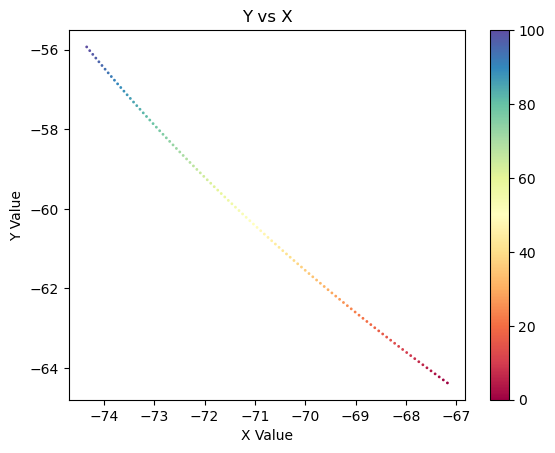

In [6]:
times = np.arange(orbits.ntimes)
pos_output = orbits[:,0].pos.xyz.value

plt.figure()
plt.scatter(pos_output[0,:], pos_output[1,:],
            c=times, cmap='Spectral',s=1)
plt.colorbar()
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Y vs X')
plt.show()